In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
Customer_data=pd.read_csv(r"C:\Users\ROG\Desktop\Customers.csv")
Product_data=pd.read_csv(r"C:\Users\ROG\Desktop\Products.csv")
Transactions_data= pd.read_csv(r"C:\Users\ROG\Desktop\Transactions.csv")

In [4]:
Customer_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
Customer_data.shape

(200, 4)

In [5]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
Customer_data.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [9]:
Customer_data.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

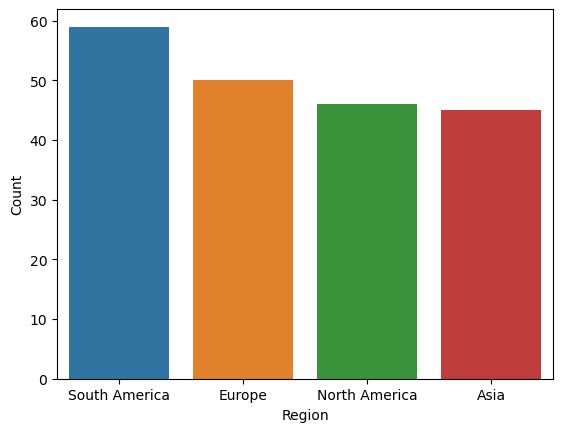

In [15]:
region_counts = Customer_data['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.ylabel("Count")
plt.xlabel("Region")
plt.show()

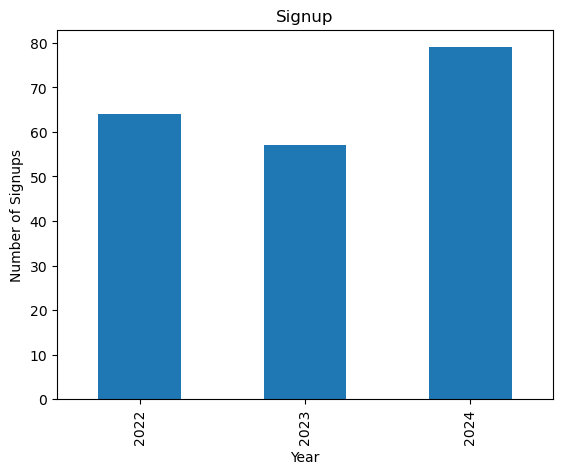

In [17]:
Customer_data['SignupDate'] = pd.to_datetime(Customer_data['SignupDate'])
Customer_data['SignupDate'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Signup")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

In [18]:
Product_data.shape

(100, 4)

In [62]:
Product_data[['Category','ProductName']].describe()

,Category,ProductName
count,100,100
unique,4,66
top,Books,ActiveWear Smartwatch
freq,26,4


In [20]:
Product_data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [27]:
Product_data.duplicated().sum()

0

In [21]:
Product_data.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [22]:
Product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


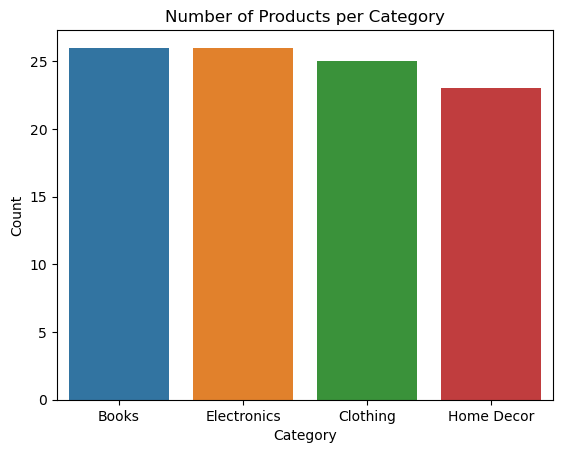

In [24]:
category_counts = Product_data['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Number of Products per Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

In [29]:
highest = Product_data.loc[Product_data.groupby('Category')['Price'].idxmax()]
print(highest)

   ProductID              ProductName     Category   Price
74      P075         TechPro Textbook        Books  497.76
44      P045        SoundWave T-Shirt     Clothing  481.78
36      P037     SoundWave Smartwatch  Electronics  459.86
22      P023  ActiveWear Cookware Set   Home Decor  454.53


In [63]:
lowest = Product_data.loc[Product_data.groupby('Category')['Price'].idxmin()]
print(lowest)

   ProductID               ProductName     Category  Price
62      P063             TechPro Novel        Books  33.59
43      P044  ActiveWear Running Shoes     Clothing  18.82
55      P056      SoundWave Smartwatch  Electronics  16.08
77      P078             HomeSense Rug   Home Decor  41.18


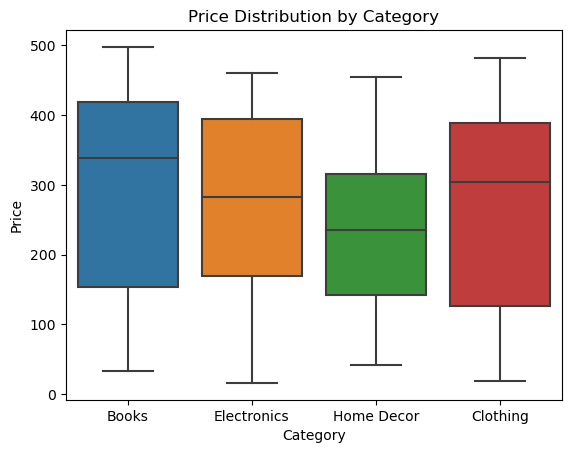

In [33]:
sns.boxplot(x='Category', y='Price', data=Product_data)
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

In [34]:
Transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [35]:
Transactions_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [39]:
Transactions_data['TransactionDate'] = pd.to_datetime(Transactions_data['TransactionDate'])

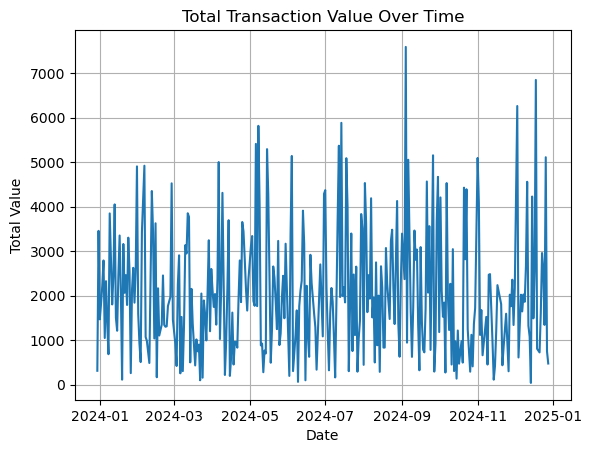

In [41]:
transactions_daily = Transactions_data.groupby(Transactions_data['TransactionDate'].dt.date)['TotalValue'].sum()
plt.plot(transactions_daily.index, transactions_daily.values,)
plt.title('Total Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.grid()
plt.show()

In [46]:
Transactions_data['TransactionDate'] = pd.to_datetime(Transactions_data['TransactionDate'])

Transactions_data = Transactions_data[['TransactionID', 'TransactionDate', 'CustomerID', 'ProductID', 'Quantity', 'Price', 'amount_spent', 'TotalValue']]

Transactions_data.insert(loc=2, column='year_month', value=Transactions_data['TransactionDate'].map(lambda x: 100*x.year + x.month))
Transactions_data.insert(loc=3, column='month', value=Transactions_data.TransactionDate.dt.month)
Transactions_data.insert(loc=4, column='day', value=(Transactions_data.TransactionDate.dt.dayofweek)+1)
Transactions_data.insert(loc=5, column='hour', value=Transactions_data.TransactionDate.dt.hour)



In [50]:
Transactions_data.head()

,TransactionID,TransactionDate,year_month,month,day,hour,CustomerID,ProductID,Quantity,Price,TotalValue
0,T00001,2024-08-25 12:38:23,202408,8,7,12,C0199,P067,1,300.68,300.68
1,T00112,2024-05-27 22:23:54,202405,5,1,22,C0146,P067,1,300.68,300.68
2,T00166,2024-04-25 07:38:55,202404,4,4,7,C0127,P067,1,300.68,300.68
3,T00272,2024-03-26 22:55:37,202403,3,2,22,C0087,P067,2,300.68,601.36
4,T00363,2024-03-21 15:10:10,202403,3,4,15,C0070,P067,3,300.68,902.04


In [56]:
merged_data = pd.merge(pd.merge(Transactions_data, Customer_data, on='CustomerID', how='left'),Product_data, on='ProductID', how='left')

merged_data.to_csv('C:/Users/ROG/desktop/Merged_Data.csv', index=False)

In [57]:
merged_data.head()

,TransactionID,TransactionDate,year_month,month,day,hour,CustomerID,ProductID,Quantity,Price_x,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,2024-08-25 12:38:23,202408,8,7,12,C0199,P067,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,2024-05-27 22:23:54,202405,5,1,22,C0146,P067,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,2024-04-25 07:38:55,202404,4,4,7,C0127,P067,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,2024-03-26 22:55:37,202403,3,2,22,C0087,P067,2,300.68,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,2024-03-21 15:10:10,202403,3,4,15,C0070,P067,3,300.68,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [67]:
merged_data.groupby('ProductID')['Quantity'].sum().nlargest(5)

ProductID
P054    46
P059    46
P029    45
P048    43
P057    43
Name: Quantity, dtype: int64

In [69]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
print("Sales by Region:\n", region_sales)

region_category_sales = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
print("Sales by Region and Category:\n", region_category_sales)

Sales by Region:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64
Sales by Region and Category:
 Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


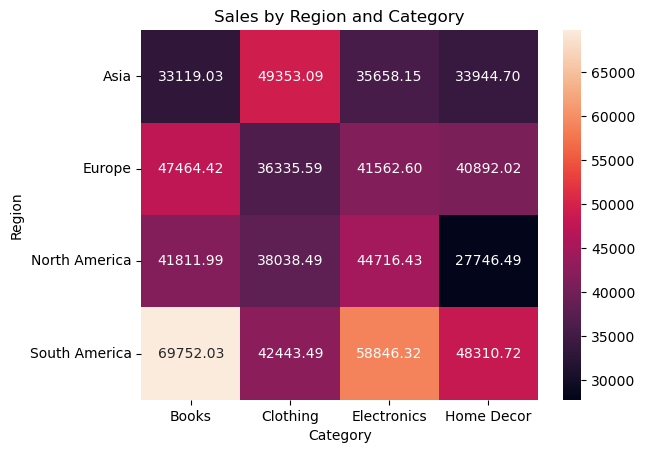

In [71]:
sns.heatmap(region_category_sales, annot=True, fmt=".2f")
plt.title('Sales by Region and Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()


In [74]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(region_category_sales)

print("Chi-Square Test Results:\n")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

print("region and category ")
if p_value < 0.05:
    print("significant.")
else:
    print("notsignificant.")

Chi-Square Test Results:

Chi2 Statistic: 12792.178245864005
P-Value: 0.0
Degrees of Freedom: 9
Expected Frequencies:
 [[42349.28806763 36624.00107963 39844.66992656 33257.01092617]
 [46297.98854109 40038.86864889 43559.83667867 36357.93613135]
 [42415.68519238 36681.4218411  39907.14019797 33309.15276855]
 [61084.5081989  52826.36843038 57471.85319679 47969.83017392]]
region and category 
significant.


In [75]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

merged_data['year'] = merged_data['TransactionDate'].dt.year
merged_data['month'] = merged_data['TransactionDate'].dt.month
merged_data['day'] = merged_data['TransactionDate'].dt.day
merged_data['hour'] = merged_data['TransactionDate'].dt.hour
merged_data['day_of_week'] = merged_data['TransactionDate'].dt.dayofweek

In [77]:
sales_by_year = merged_data.groupby('year')['TotalValue'].sum()
print("Year:\n", sales_by_year)

sales_by_month = merged_data.groupby('month')['TotalValue'].sum()
print("Month:\n", sales_by_month)

sales_by_day_of_week = merged_data.groupby('day_of_week')['TotalValue'].sum()
print("Day:\n", sales_by_day_of_week)

sales_by_hour = merged_data.groupby('hour')['TotalValue'].sum()
print("Hour:\n", sales_by_hour)


Year:
 year
2023      3769.52
2024    686226.04
Name: TotalValue, dtype: float64
Month:
 month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64
Day:
 day_of_week
0    101984.33
1    108567.61
2    119203.15
3     99202.71
4     87032.09
5     81399.74
6     92605.93
Name: TotalValue, dtype: float64
Hour:
 hour
0     24981.18
1     23590.89
2     24643.42
3     31643.94
4     33147.60
5     22871.70
6     24620.36
7     27446.64
8     21127.18
9     33595.06
10    26511.34
11    27317.78
12    25761.01
13    21943.91
14    38323.60
15    25388.92
16    38455.39
17    33030.25
18    29710.35
19    32346.61
20    26132.75
21    30686.67
22    35954.94
23    30764.07
Name: TotalValue, dtype: float64


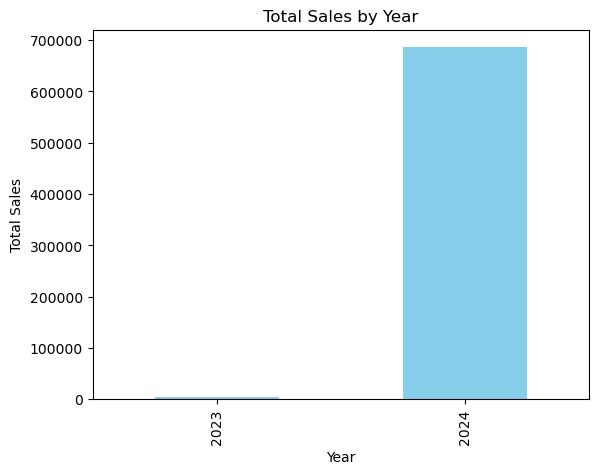

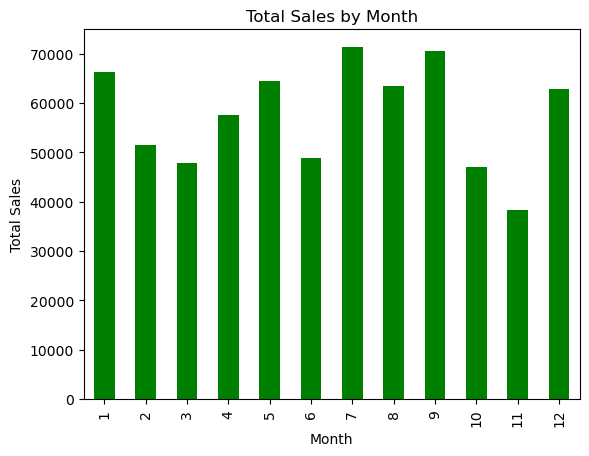

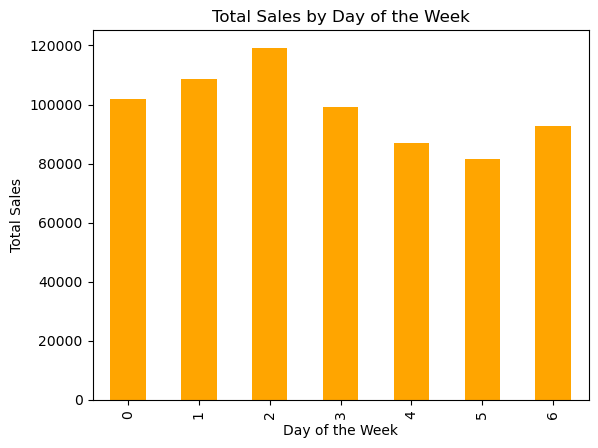

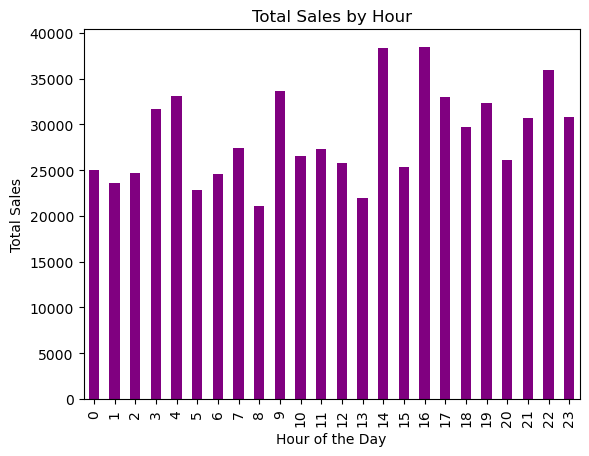

Peak sales occur at hour 16:00.
Peak sales occur on day 2
peak month  7


In [81]:
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


sales_by_month.plot(kind='bar', color='green')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

sales_by_day_of_week.plot(kind='bar', color='orange')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

sales_by_hour.plot(kind='bar', color='purple')
plt.title('Total Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()


peak_hour = sales_by_hour.idxmax()
peak_day_of_week = sales_by_day_of_week.idxmax()
peak_month = sales_by_month.idxmax()
print(f"Peak sales occur at hour {peak_hour}:00.")
print("Peak sales occur on day",peak_day_of_week)
print("peak month ",peak_month)

Correlation Matrix:
           month       day      hour
month  1.000000 -0.051107  0.032948
day   -0.051107  1.000000  0.022193
hour   0.032948  0.022193  1.000000


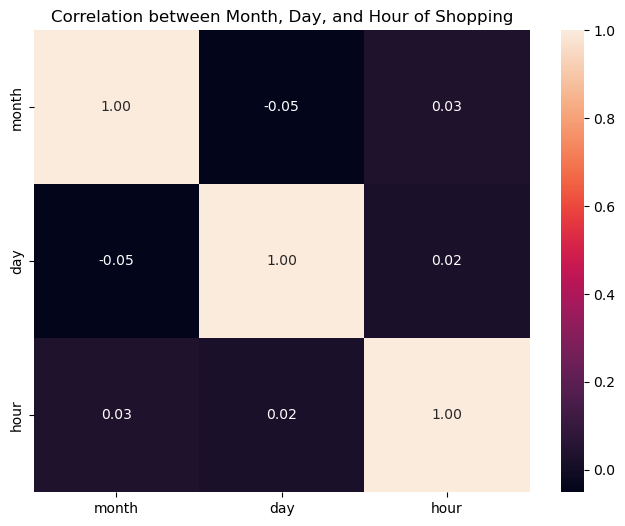

In [82]:
data = merged_data[['month', 'day', 'hour']].corr()
print("Correlation Matrix:\n",data)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt='.2f')
plt.title('Correlation between Month, Day, and Hour of Shopping')
plt.show()

In [85]:
merged_data['Price'] = merged_data[['Price_x', 'Price_y']].max(axis=1)

Max revenue-generating product is ProductID P029 with revenue of 19513.8.
Products with high sales volume despite low prices:
     ProductID  SalesVolume  AveragePrice
135      P054           46         57.30
22       P057           43        239.70
210      P061           43        156.96
888      P028           38        235.58
428      P022           38        137.54


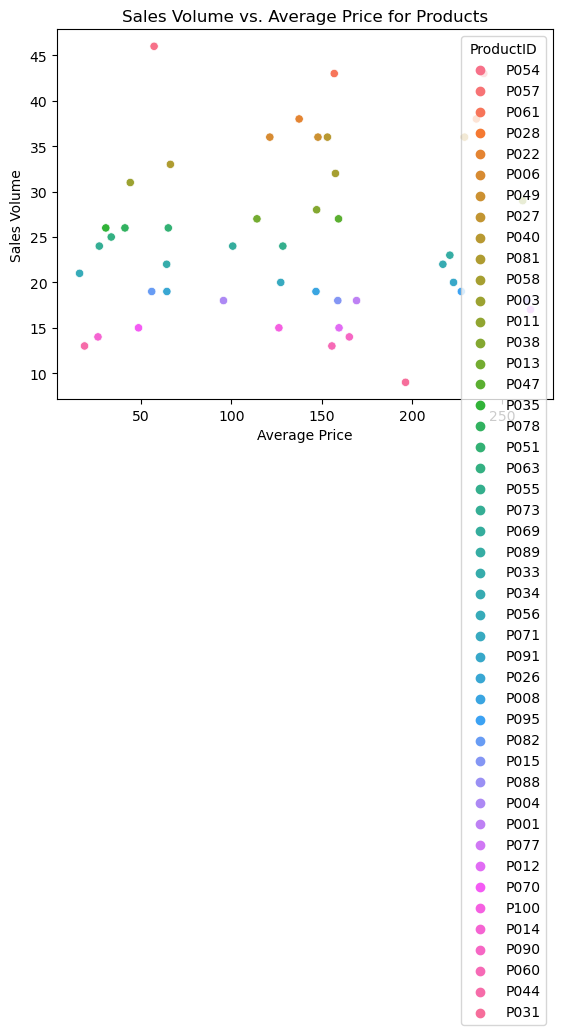

In [88]:
max_revenue_product = merged_data.groupby('ProductID')['TotalValue'].sum().idxmax()
max_revenue = merged_data.groupby('ProductID')['TotalValue'].sum().max()
print(f"Max revenue-generating product is ProductID {max_revenue_product} with revenue of {max_revenue}.")

merged_data['SalesVolume'] = merged_data.groupby('ProductID')['Quantity'].transform('sum')
merged_data['AveragePrice'] = merged_data.groupby('ProductID')['Price'].transform('mean')

high_sales_low_price = merged_data[['ProductID', 'SalesVolume', 'AveragePrice']].drop_duplicates()
high_sales_low_price = high_sales_low_price[high_sales_low_price['AveragePrice'] < high_sales_low_price['AveragePrice'].mean()].sort_values(by='SalesVolume', ascending=False)

print("Products with high sales volume despite low prices:\n", high_sales_low_price.head())

sns.scatterplot(data=high_sales_low_price, x='AveragePrice', y='SalesVolume', hue='ProductID')
plt.title('Sales Volume vs. Average Price for Products')
plt.xlabel('Average Price')
plt.ylabel('Sales Volume')
plt.show()


In [93]:
#merged_data['TotalRevenue'] = merged_data['Quantity'] * merged_data['Price']


Correlation between ProductID and Revenue: 0.034949575204752975


In [96]:
product_aggregations = merged_data.groupby('ProductID').agg(
    total_sales=('Quantity', 'sum'),
    average_price=('Price', 'mean'),
    total_revenue=('TotalValue', 'sum'),
    sales_volume=('Quantity', 'sum')
).reset_index()

# Print aggregated product data
print("Product-level Aggregations:\n", product_aggregations)

# Analyze categories
category_aggregations = merged_data.groupby('Category').agg(
    total_sales=('Quantity', 'sum'),
    average_price=('Price', 'mean'),
    total_revenue=('TotalValue', 'sum')
).reset_index()

print("Category-level Aggregations:\n", category_aggregations)

Product-level Aggregations:
    ProductID  total_sales  average_price  total_revenue  sales_volume
0       P001           18         169.30        3047.40            18
1       P002           25         346.30        8657.50            25
2       P003           31          44.12        1367.72            31
3       P004           18          95.69        1722.42            18
4       P005           24         429.31       10303.44            24
..       ...          ...            ...            ...           ...
95      P096           34         307.47       10453.98            34
96      P097           25         319.34        7983.50            25
97      P098           16         299.93        4798.88            16
98      P099           11         354.29        3897.19            11
99      P100           15         126.34        1895.10            15

[100 rows x 5 columns]
Category-level Aggregations:
       Category  total_sales  average_price  total_revenue
0        Books     

Customer Lifetime Value:
   CustomerID  LifetimeValue
0      C0001        3354.52
1      C0002        1862.74
2      C0003        2725.38
3      C0004        5354.88
4      C0005        2034.24
Customer Purchase Frequency:
   CustomerID  PurchaseFrequency
0      C0001                  5
1      C0002                  4
2      C0003                  4
3      C0004                  8
4      C0005                  3
Customer Recency Analysis:
     CustomerID  Recency
150      C0181        0
227      C0197        0
17       C0101        0
173      C0119        1
5        C0188        1
Top Product Preferences by Customer:
   CustomerID     Category  Quantity
1      C0001  Electronics         7
2      C0001   Home Decor         3
0      C0001        Books         2
4      C0002   Home Decor         6
3      C0002     Clothing         4
Time-Based Customer Behavior:
   CustomerID  most_active_hour  most_active_day
0      C0001                 3                1
1      C0002                 1 

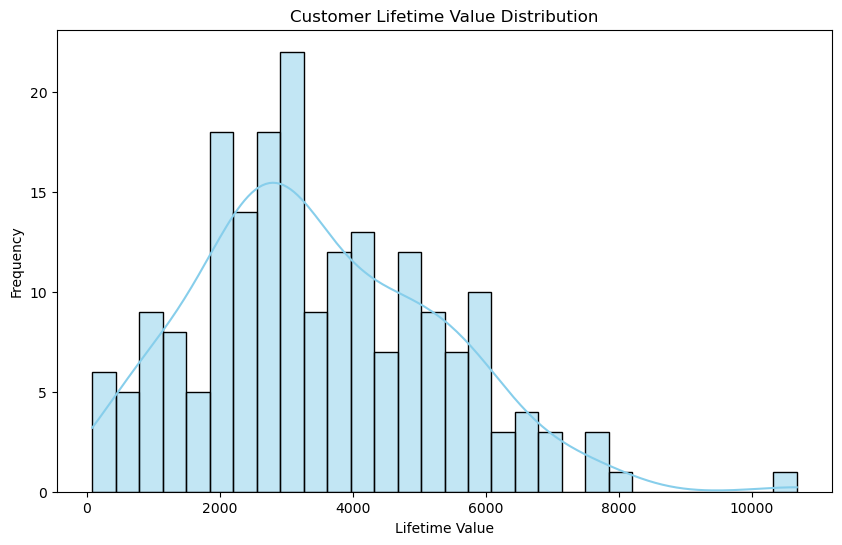

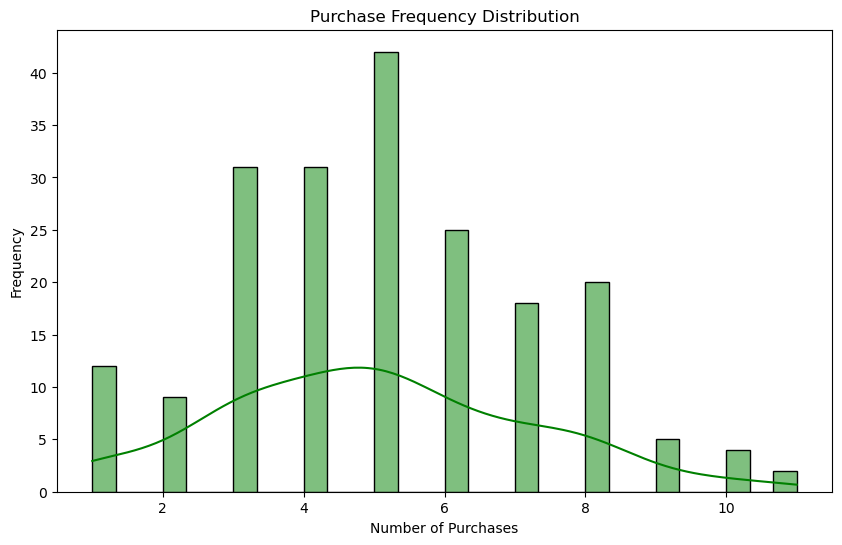

In [100]:
# Customer Lifetime Value (CLV)
customer_clv = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_clv.rename(columns={'TotalValue': 'LifetimeValue'}, inplace=True)
print("Customer Lifetime Value:\n", customer_clv.head())

# Purchase Frequency
purchase_frequency = merged_data.groupby('CustomerID')['TransactionDate'].count().reset_index()
purchase_frequency.rename(columns={'TransactionDate': 'PurchaseFrequency'}, inplace=True)
print("Customer Purchase Frequency:\n", purchase_frequency.head())

# Recency Analysis
latest_date = merged_data['TransactionDate'].max()
merged_data['Recency'] = merged_data.groupby('CustomerID')['TransactionDate'].transform(lambda x: (latest_date - x.max()).days)
customer_recency = merged_data[['CustomerID', 'Recency']].drop_duplicates().sort_values(by='Recency')
print("Customer Recency Analysis:\n", customer_recency.head())

# Product Preferences (Basket Analysis)
customer_preferences = merged_data.groupby(['CustomerID', 'Category'])['Quantity'].sum().reset_index()
top_preferences = customer_preferences.sort_values(['CustomerID', 'Quantity'], ascending=[True, False]).groupby('CustomerID').head(3)
print("Top Product Preferences by Customer:\n", top_preferences.head())

# Time-Based Behavior
time_based_behavior = merged_data.groupby('CustomerID').agg(
    most_active_hour=('hour', lambda x: x.mode()[0]),
    most_active_day=('day_of_week', lambda x: x.mode()[0])
).reset_index()
print("Time-Based Customer Behavior:\n", time_based_behavior.head())

# Visualization for CLV
plt.figure(figsize=(10, 6))
sns.histplot(customer_clv['LifetimeValue'], bins=30, kde=True, color='skyblue')
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Lifetime Value')
plt.ylabel('Frequency')
plt.show()

# Visualization for Purchase Frequency
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency['PurchaseFrequency'], bins=30, kde=True, color='green')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()


In [103]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [105]:
customer_aggregations = merged_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    unique_products=('ProductID', 'nunique'),
    average_price=('Price', 'mean')
).reset_index()

# Encode categorical variables (if necessary)
label_encoder = LabelEncoder()
merged_data['Category'] = label_encoder.fit_transform(merged_data['Category'])

# Create customer-product matrix for similarity
customer_product_matrix = merged_data.pivot_table(
    index='CustomerID', 
    columns='ProductID', 
    values='Quantity', 
    fill_value=0
)

# Scale numerical features for similarity calculation
scaler = StandardScaler()
numerical_features = customer_aggregations[['total_spend', 'total_quantity', 'unique_products', 'average_price']]
scaled_features = scaler.fit_transform(numerical_features)

# Combine scaled numerical features and customer-product matrix
combined_features = np.hstack([scaled_features, customer_product_matrix.values])

# Calculate cosine similarity
similarity_matrix = cosine_similarity(combined_features)

# Build lookalike recommendations
def recommend_lookalikes(customer_id, similarity_matrix, customer_ids, top_n=3):
    customer_idx = customer_ids.index(customer_id)
    similarity_scores = list(enumerate(similarity_matrix[customer_idx]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]  # Exclude self
    recommendations = [(customer_ids[idx], round(score, 2)) for idx, score in sorted_scores]
    return recommendations

# Get all customer IDs
customer_ids = customer_aggregations['CustomerID'].tolist()

# Example: Generate lookalike recommendations for a specific customer
example_customer_id = customer_ids[0]  # Replace with desired CustomerID
recommendations = recommend_lookalikes(example_customer_id, similarity_matrix, customer_ids)
print(f"Top 3 Lookalike Recommendations for Customer {example_customer_id}:", recommendations)

# Generate recommendations for all customers and save to CSV
lookalike_results = {}
for customer_id in customer_ids:
    lookalike_results[customer_id] = recommend_lookalikes(customer_id, similarity_matrix, customer_ids)

lookalike_df = pd.DataFrame({
    'CustomerID': list(lookalike_results.keys()),
    'Recommendations': list(lookalike_results.values())
})

lookalike_df.to_csv('C:/Users//ROG/Desktop/Lookalike_Model_Results.csv', index=False)
print("Lookalike model results saved to Lookalike_Model_Results.csv")


Top 3 Lookalike Recommendations for Customer C0001: [('C0194', 0.46), ('C0199', 0.43), ('C0065', 0.38)]
Lookalike model results saved to Lookalike_Model_Results.csv
